# 이미지처리

In [3]:
#!pip install opencv-python
#!pip install matplotlib

## 이미지 밝기 및 개선 평가

<>:7: SyntaxWarning: invalid escape sequence '\k'
<>:7: SyntaxWarning: invalid escape sequence '\k'
C:\Users\user\AppData\Local\Temp\ipykernel_20364\1017696574.py:7: SyntaxWarning: invalid escape sequence '\k'
  img = cv2.imread('C:\kjw\sample.jpg')


평균 밝기: 152.31
☀️이미지가 너무 밝습니다.


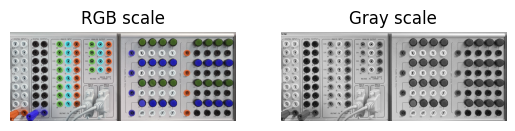

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import cv2                          # 원래는 RGB인데 CV2는 BGR로 되어있음. 필요에따라 컨버팅해서 사용

# numpy로 즉석 이미지 생성
#img = np.random.randint(0, 256, (100, 100, 3), dtype = np.uint8)             # 100픽셀, 100픽셀에 컬러가 3개인 데이터 생성
img = cv2.imread('C:\kjw\sample.jpg')

# 그레이스케일 변환 (색상을 단순화 시켜 -> 밝기로 변화)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 이미지의 평균 밝기를 계산
mean_brightness = np.mean(gray)
print(f"평균 밝기: {mean_brightness:.2f}")

if mean_brightness < 127.5:
    print("🌃이미지가 너무 어둡습니다.")
    gray = cv2.putText(gray.copy(), "Too Dark", (10,50), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255), 2, cv2.LINE_AA)

elif mean_brightness >= 127.9:
    print("☀️이미지가 너무 밝습니다.")
    gray = cv2.putText(gray.copy(), "Too Bright", (4,50), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0), 2, cv2.LINE_AA)
else:
    print("😊정상 이미지 입니다.")

plt.subplot(1, 2, 1)        # (행, 열, )
plt.title("RGB scale")
plt.axis('off')
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.title("Gray scale")
plt.imshow(gray, cmap="gray")
plt.axis('off')
plt.show()


## HSV 와 이미지 처리

#### H - HUE(색상) 0~179(원래는 360 -> OpenCV 180단계로 줄임), 2로 나눔
- 빨강 : 0, 179 부근(양끝)
- 노랑 : 30
- 하늘 : 90
- 파랑 : 120
- 보라 : 150
#### S - Saturation(채도)
- 0 ~ 255 : 값이 낮을 수록 회색(탁한색) 높을수록 원색
#### V - Value(명도)
- 0 ~ 255 : 색의 밝기, 낮을 수록 검정(0) 높을 수록 원색

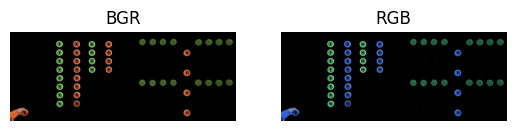

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# numpy로 즉석 이미지 생성
hsv_img = cv2.cvtColor(img , cv2.COLOR_BGR2HSV)

# 파란색 범위를 정의(HSV)
lower_blue = np.array([50,50,50])
upper_blue = np.array([170,255,255])

# 마스크
mask = cv2.inRange(hsv_img, lower_blue, upper_blue)

blue_region = cv2.bitwise_and(img, img, mask = mask)
blue_region_rgb = cv2.cvtColor(blue_region, cv2.COLOR_BGR2RGB)

plt.subplot(1,2,1)
plt.title("BGR")
plt.imshow(blue_region)
plt.axis('off')

plt.subplot(1,2,2)
plt.title("RGB")
plt.imshow(blue_region_rgb)
plt.axis('off')
plt.show()

(1346, 3401, 3)


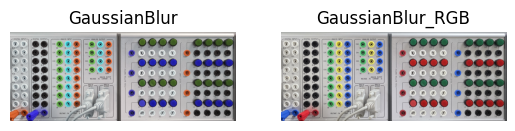

In [29]:
# 가우시안 블러 적용 (노이즈 제거)
blurred = cv2.GaussianBlur(img,(7,7),0)
blurred_rgb = cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB)

print(blurred.shape)

plt.subplot(1,2,1)
plt.imshow(blurred)
plt.title("GaussianBlur")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(blurred_rgb)
plt.title("GaussianBlur_RGB")
plt.axis('off')

plt.show()

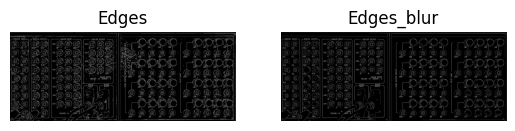

In [33]:
edges = cv2.Canny(img, 50, 150)  # 50보다 작으면 값을 무시, 150보다 클경우 강하게 엣지로 인정
edges_blur = cv2.Canny(blurred_rgb, 50, 150)  # 50보다 작으면 값을 무시, 150보다 클경우 강하게 엣지로 인정

plt.subplot(1,2,1)
plt.imshow(edges, cmap="gray")
plt.title("Edges")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(edges_blur, cmap="gray")
plt.title("Edges_blur")
plt.axis('off')

plt.show()

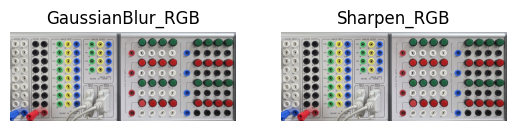

In [24]:
# blurred

# 3X3 선명화 커널
sharp_kernel = np.array([
    [0, -1,  0],
    [-1, 5, -1],
    [0, -1,  0]
])

sharpen = cv2.filter2D(blurred, -1, sharp_kernel)
sharpen_rgb = cv2.cvtColor(sharpen, cv2.COLOR_BGR2RGB)

plt.subplot(1,2,1)
plt.imshow(blurred_rgb)
plt.title("GaussianBlur_RGB")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(sharpen_rgb)
plt.title("Sharpen_RGB")
plt.axis('off')

plt.show()

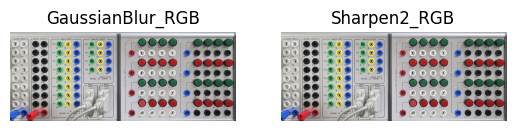

In [ ]:
# 고급 선명화 기법

# blue_region
# blurred

sharpen2 = cv2.addWeighted(img, 1.5, blurred, -0.5, 0)
sharpen2_rgb = cv2.cvtColor(sharpen2, cv2.COLOR_BGR2RGB)


plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("GaussianBlur_RGB")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(sharpen2_rgb)
plt.title("Sharpen2_RGB")
plt.axis('off')

plt.show()